#**Netflix Project**

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
netflix = pd.read_csv('/content/drive/MyDrive/Netflix  Project Data/combinedNetflixData.txt')
movie = pd.read_csv('/content/drive/MyDrive/Netflix  Project Data/movies.csv')

In [13]:
movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [14]:
print(netflix.shape)
print(movie.shape)

(24058262, 1)
(27278, 3)


In [15]:
netflix.head()

,,1:
1488844,3.0,2005-09-06
822109,5.0,2005-05-13
885013,4.0,2005-10-19
30878,4.0,2005-12-26
823519,3.0,2004-05-03


In [16]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 24058262 entries, ('1488844', 3.0) to ('1704416', 3.0)
Data columns (total 1 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   1:      object
dtypes: object(1)
memory usage: 318.0+ MB


In [17]:
netflix.head(10)

,,1:
1488844,3.0,2005-09-06
822109,5.0,2005-05-13
885013,4.0,2005-10-19
30878,4.0,2005-12-26
823519,3.0,2004-05-03
893988,3.0,2005-11-17
124105,4.0,2004-08-05
1248029,3.0,2004-04-22
1842128,4.0,2004-05-09
2238063,3.0,2005-05-11


In [18]:
netflix.isnull().sum()

,0
1:,4498


In [19]:
# Reading dataset file
netflix = pd.read_csv('/content/drive/MyDrive/Netflix  Project Data/combinedNetflixData.txt',
                     header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])

In [20]:
netflix.head()

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0


In [21]:
netflix.tail()

,Cust_Id,Rating
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0
24058262,1704416,3.0


In [22]:
netflix.dtypes

,0
Cust_Id,object
Rating,float64


In [23]:
netflix.isnull()

,Cust_Id,Rating
0,False,True
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
24058258,False,False
24058259,False,False
24058260,False,False
24058261,False,False


In [24]:
# netflix['Rating'] = netflix['Rating']astype(float)

In [25]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24058263 entries, 0 to 24058262
Data columns (total 2 columns):
 #   Column   Dtype  
---  ------   -----  
 0   Cust_Id  object 
 1   Rating   float64
dtypes: float64(1), object(1)
memory usage: 367.1+ MB


In [26]:
movie_count = netflix.isnull().sum()
movie_count

,0
Cust_Id,0
Rating,4499


In [27]:
# Get the movie count with nan values

movie_count = netflix.isnull().sum()
movie_count = movie_count['Rating']

In [28]:
movie_count

4499

In [29]:
netflix.shape

(24058263, 2)

In [30]:
# to calculate how many customers we are having in dataset
customer_count = netflix['Cust_Id'].nunique()

In [31]:
# this also incclude unique movie id's
customer_count

475257

In [32]:
# Without null values
customer_count = customer_count - movie_count
customer_count

470758

In [33]:
netflix['Cust_Id'].count() # These are the number of times rating given

24058263

In [34]:
# get the total number of ratings given by customers
rating_count = netflix['Cust_Id'].count() - movie_count #Subtracting movie_count to get actual rating count
rating_count

24053764

In [35]:
# To find how many people have rated the movies as 1,2,3,4,5 stars ratings to te movies
# 1st method
# netflix.groupby('Rating').count()
netflix["Rating"].value_counts()

,count
Rating,
4.0,8085741
3.0,6904181
5.0,5506583
2.0,2439073
1.0,1118186


In [36]:
#To find out how many people have rated the movies as 1, 2, 3,4,5 stars ratings to the movies
# 2nd method
p = netflix.groupby('Rating')['Rating'].count()
p

,Rating
Rating,
1.0,1118186
2.0,2439073
3.0,6904181
4.0,8085741
5.0,5506583


In [37]:
#To find out how many people have rated the movies as 1, 2, 3,4,5 stars ratings to the movies
# 3rd method
stars=netflix.groupby('Rating')['Rating'].agg(['count'])
stars

,count
Rating,
1.0,1118186
2.0,2439073
3.0,6904181
4.0,8085741
5.0,5506583


###**2.1 To plot the distribution of the ratings in as a bar plot**

In [38]:
# ax = sns.barplot(data = netflix, x = 'Rating', y = 'Cust_Id')
# plt.title(f'Total pool: {movie_count} Movies, {customer_count} Customers, {rating_count} ratings given', fontsize = 12)
# plt.grid(True)
# plt.show()

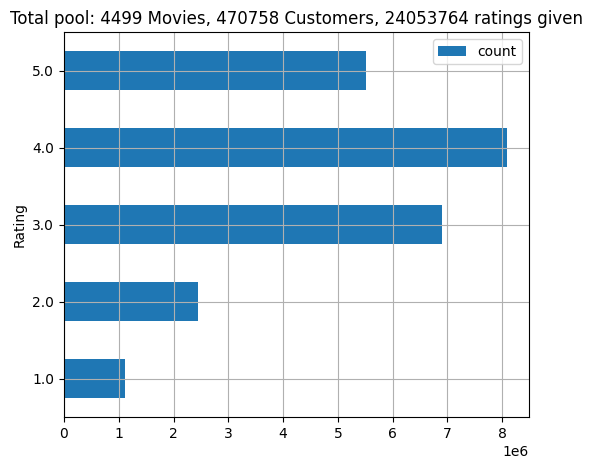

In [39]:
ax = stars.plot(kind='barh',figsize = (6,5))
plt.title(f'Total pool: {movie_count} Movies, {customer_count} Customers, {rating_count} ratings given', fontsize = 12)
plt.grid(True)
plt.show()

In [40]:
pd.isnull(netflix.Rating)

,Rating
0,True
1,False
2,False
3,False
4,False
...,...
24058258,False
24058259,False
24058260,False
24058261,False


In [41]:
#add another column that will have movie id
#first of all we will be calculating how many null values we are having in the ratings column

df_nan = pd.DataFrame(pd.isnull(netflix.Rating))
df_nan

,Rating
0,True
1,False
2,False
3,False
4,False
...,...
24058258,False
24058259,False
24058260,False
24058261,False


In [42]:
df_nan = df_nan[df_nan['Rating']==True]
df_nan

,Rating
0,True
548,True
694,True
2707,True
2850,True
...,...
24046714,True
24047329,True
24056849,True
24057564,True


In [43]:
df_nan.shape

(4499, 1)

In [44]:
df_nan.head()

,Rating
0,True
548,True
694,True
2707,True
2850,True


In [45]:
df_nan.tail()

,Rating
24046714,True
24047329,True
24056849,True
24057564,True
24057834,True


In [46]:
#now we will reset the index as the column
df_nan = df_nan.reset_index()
df_nan

,index,Rating
0,0,True
1,548,True
2,694,True
3,2707,True
4,2850,True
...,...,...
4494,24046714,True
4495,24047329,True
4496,24056849,True
4497,24057564,True


In [47]:
df_nan['index'][0:-1] # will extract all the records from the index column except for the last index-- 4498

,index
0,0
1,548
2,694
3,2707
4,2850
...,...
4493,24046583
4494,24046714
4495,24047329
4496,24056849


In [48]:
df_nan['index'][1:] # this sytax will extract records from the index column from the 1st index

,index
1,548
2,694
3,2707
4,2850
5,3991
...,...
4494,24046714
4495,24047329
4496,24056849
4497,24057564


In [49]:
np.full((2,4), '2.0') #working of full function

array([['2.0', '2.0', '2.0', '2.0'],
       ['2.0', '2.0', '2.0', '2.0']], dtype='<U3')

In [50]:
#working
x = zip(df_nan['index'][1:], df_nan['index'][:-1])
x

In [51]:
tuple(x)

((548, 0),
 (694, 548),
 (2707, 694),
 (2850, 2707),
 (3991, 2850),
 (5011, 3991),
 (5105, 5011),
 (20016, 5105),
 (20112, 20016),
 (20362, 20112),
 (20561, 20362),
 (21108, 20561),
 (21234, 21108),
 (21353, 21234),
 (21644, 21353),
 (24344, 21644),
 (31453, 24344),
 (42176, 31453),
 (42716, 42176),
 (42833, 42716),
 (43052, 42833),
 (43256, 43052),
 (43872, 43256),
 (45206, 43872),
 (46414, 45206),
 (52276, 46414),
 (52550, 52276),
 (92303, 52550),
 (92827, 92303),
 (211241, 92827),
 (211463, 211241),
 (213318, 211463),
 (220209, 213318),
 (220318, 220209),
 (221158, 220318),
 (222098, 221158),
 (222380, 222098),
 (223183, 222380),
 (223936, 223183),
 (224428, 223936),
 (224522, 224428),
 (224651, 224522),
 (224757, 224651),
 (233259, 224757),
 (235879, 233259),
 (242438, 235879),
 (244789, 242438),
 (248381, 244789),
 (248613, 248381),
 (248942, 248613),
 (249033, 248942),
 (254181, 249033),
 (254296, 254181),
 (254456, 254296),
 (256863, 254456),
 (258697, 256863),
 (262260, 258697)

In [52]:
694-548-1 # for movie 2

145

In [53]:
temp = np.full((1,145), 2)
print(temp)

[[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
  2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
  2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
  2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
  2]]


In [54]:
# now we will create a numpy array that will contain 1 from values 0 to 547, 2 from 548 to 693 and so on

movie_np = []
movie_id = 1
for i, j in zip(df_nan['index'][1:], df_nan['index'][:-1]):
    temp=np.full((1, i-j-1), movie_id)
    movie_np=np.append(movie_np, temp)
    movie_id+=1

print(movie_np)


[1.000e+00 1.000e+00 1.000e+00 ... 4.498e+03 4.498e+03 4.498e+03]


In [55]:
# example code for last record
import pandas as pd

# Create a dictionary with data
data = {
    'index': [10, 30, 50],
    'B': [20, 40, 60]
}

# Create the DataFrame
df_nan1 = pd.DataFrame(data)

# Print the DataFrame
print(df_nan1)


   index   B
0     10  20
1     30  40
2     50  60


In [56]:
df_nan1.iloc[-1, 0]

50

In [57]:
netflix_dataset = netflix[pd.notnull(netflix['Rating'])] # including all not null values of ratings coolumn

# now we will create a numpy array that will contain 1 from values 0 to 547, 2 from 548 to 693 and so on

movie_np = []
movie_id = 1
for i, j in zip(df_nan['index'][1:], df_nan['index'][:-1]):
    temp=np.full((1, i-j-1), movie_id)
    movie_np=np.append(movie_np, temp)
    movie_id+=1

# Add the movie ID for the ratings after the last null value
# The number of these ratings is the total number of non-null ratings minus the current length of movie_np
last_movie_ratings_count = len(netflix[pd.notnull(netflix['Rating'])]) - len(movie_np)
temp_last_movie = np.full((1, last_movie_ratings_count), movie_id)
movie_np = np.append(movie_np, temp_last_movie)

print(movie_np)


[1.000e+00 1.000e+00 1.000e+00 ... 4.499e+03 4.499e+03 4.499e+03]


In [58]:
netflix_dataset = netflix[pd.notnull(netflix['Rating'])] # including all not null values of ratings coolumn

# Now movie_np should have the correct length to match netflix_dataset
netflix_dataset['Movie_Id'] = movie_np.astype(int)
netflix_dataset['Cust_Id']=netflix_dataset['Cust_Id'].astype(int)   # its a integer column
print("Now the dataset will look like: ")

print(netflix_dataset.head()) # Print the head to see the new column

<ipython-input-58-bc2588511249>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_dataset['Movie_Id'] = movie_np.astype(int)


Now the dataset will look like: 
   Cust_Id  Rating  Movie_Id
1  1488844     3.0         1
2   822109     5.0         1
3   885013     4.0         1
4    30878     4.0         1
5   823519     3.0         1


<ipython-input-58-bc2588511249>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_dataset['Cust_Id']=netflix_dataset['Cust_Id'].astype(int)   # its a integer column


In [59]:
netflix_dataset.tail()

,Cust_Id,Rating,Movie_Id
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499
24058262,1704416,3.0,4499


In [60]:
#now we will remove all the users that have rated less movies and
#also all those movies that has been rated less in numbers


In [61]:
netflix_dataset

,Cust_Id,Rating,Movie_Id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1
...,...,...,...
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499


In [62]:
dataset_movie_summary = netflix_dataset.groupby('Movie_Id')['Rating'].agg(["count"])

In [63]:
dataset_movie_summary

,count
Movie_Id,
1,547
2,145
3,2012
4,142
5,1140
...,...
4495,614
4496,9519
4497,714


In [64]:
# Benchmark

In [65]:
dataset_movie_summary["count"].quantile(0.7)

1798.6

In [66]:
#now we will create a benchmark
movie_benchmark = round(dataset_movie_summary['count'].quantile(0.7),0)
movie_benchmark

1799.0

In [67]:
dataset_movie_summary['count']

,count
Movie_Id,
1,547
2,145
3,2012
4,142
5,1140
...,...
4495,614
4496,9519
4497,714


In [68]:
drop_movie_list=dataset_movie_summary[dataset_movie_summary['count'] < movie_benchmark].index
drop_movie_list

Index([   1,    2,    4,    5,    6,    7,    9,   10,   11,   12,
       ...
       4484, 4486, 4487, 4489, 4491, 4494, 4495, 4497, 4498, 4499],
      dtype='int64', name='Movie_Id', length=3149)

In [69]:
len(drop_movie_list)

3149

In [70]:
# Now we will remove all the inactive users
dataset_cust_summary = netflix_dataset.groupby('Cust_Id')['Rating'].agg(["count"])
dataset_cust_summary

,count
Cust_Id,
6,153
7,195
8,21
10,49
25,4
...,...
2649404,12
2649409,10
2649421,3


In [71]:
cust_benchmark = round(dataset_cust_summary['count'].quantile(0.7),0)
cust_benchmark

52.0

In [72]:
drop_cust_list = dataset_cust_summary[dataset_cust_summary['count'] < cust_benchmark].index
drop_cust_list

Index([      8,      10,      25,      33,      42,      59,      83,      87,
            94,     116,
       ...
       2649343, 2649351, 2649375, 2649376, 2649379, 2649384, 2649401, 2649404,
       2649409, 2649421],
      dtype='int64', name='Cust_Id', length=327300)

In [73]:
len(drop_cust_list)

327300

In [74]:
# We will remove all the customers and movies that are below the benchmark
print('The original dataframe has: ', netflix_dataset.shape, 'shape')

The original dataframe has:  (24053764, 3) shape


In [75]:
netflix_dataset['Movie_Id'].isin(drop_movie_list)

,Movie_Id
1,True
2,True
3,True
4,True
5,True
...,...
24058258,True
24058259,True
24058260,True
24058261,True


In [76]:
netflix_dataset=netflix_dataset[~netflix_dataset['Movie_Id'].isin(drop_movie_list)] # ~ means NOT
netflix_dataset=netflix_dataset[~netflix_dataset['Cust_Id'].isin(drop_cust_list)]

print('After the triming, the shape is: {}'.format(netflix_dataset.shape))

After the triming, the shape is: (17337458, 3)


In [77]:
netflix_dataset.head()

,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3


In [2]:
import pandas as pd

df_title = pd.read_csv("/content/drive/MyDrive/Netflix  Project Data/NetflixMovieData (1).csv",
                       encoding='ISO-8859-1', header = None, usecols = [0,1,2], names = ['Movie_Id','Year','Name' ])

df_title.set_index('Movie_Id', inplace=True)

In [3]:
df_title.head(10)

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
6,1997.0,Sick
7,1992.0,8 Man
8,2004.0,What the #$*! Do We Know!?
9,1991.0,Class of Nuke 'Em High 2


In [4]:
df_title.iloc[:4499,:]

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
...,...,...
4495,2002.0,Clifford: Happy Birthday Clifford / Puppy Love
4496,1993.0,Farewell My Concubine
4497,1990.0,Texasville


In [5]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl size=2461556 sha256=16ea76966cce7dcc80386d318ec203e93022f2bd946c192230d8258816069e5a
  Stored in directory: /root/.cache/pip/wheels/2a/8f/6e/7e2899163e2d85d8266daab4aa1cdabec7a6c56f83c015b5af
Successfully built scikit-surprise


In [6]:
# Model building

import math
import seaborn as sns
from surprise import Reader, Dataset, SVD  # Singular value decomposition
from surprise.model_selection import cross_validate

In [8]:
# SVD performs dimensionality reduction for recommendation
#!pip install scikit-surprise

In [7]:
# Help us to read the dataset for SVD algorithm

reader = Reader()

# It will convert data frame into Pivot tables where columns will be movie ids and rows will be customers id

In [78]:
# We only work with top 100K rows for quick runtime
data = Dataset.load_from_df(netflix_dataset[['Cust_Id','Movie_Id','Rating']][:100000], reader)

In [79]:
data

In [80]:
model = SVD()

# Cross_validate(svd, data, measures=['RMSE','MAE'], cv=3)
# For 1st fold- 1,2,3,4,5

In [81]:
cross_validate(model, data, measures=['RMSE','MAE'], cv = 4)

{'test_rmse': array([0.9978885 , 0.99735707, 0.99935579, 0.99026124]),
 'test_mae': array([0.7993238 , 0.7999327 , 0.7998094 , 0.79008281]),
 'fit_time': (1.4617195129394531,
  1.4902079105377197,
  1.5315310955047607,
  1.4985511302947998),
 'test_time': (0.1342754364013672,
  0.2617032527923584,
  0.24932456016540527,
  0.11112761497497559)}

In [82]:
netflix_dataset.head()

,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3


In [83]:
# netflix_dataset['Cust_Id']=netflix_dataset['Cust_Id'].astype(int)

In [84]:
# So first we take user 1331154 and we try to recommend some movies based on the past data
# He rated so many movies with 5 *

dataset_1331154 = netflix_dataset[(netflix_dataset['Cust_Id'] == 1331154)& (netflix_dataset['Rating'] == 5)]
dataset_1331154

,Cust_Id,Rating,Movie_Id
458308,1331154,5.0,143
1184450,1331154,5.0,270
1991774,1331154,5.0,361
2369367,1331154,5.0,457
2600328,1331154,5.0,482
3417458,1331154,5.0,658
4029215,1331154,5.0,763
5646194,1331154,5.0,1144
7075510,1331154,5.0,1425
7423467,1331154,5.0,1476


In [85]:
df_title

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
...,...,...
17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17767,2004.0,Fidel Castro: American Experience
17768,2000.0,Epoch


In [86]:
# Now we will build the recommendation algorithm
# First, we will make a shallow copy of the movie_titles.csv file so that we can change
# The values in the copied dataset, not in the actual dataset

user_1331154=df_title.copy()
user_1331154

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
...,...,...
17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17767,2004.0,Fidel Castro: American Experience
17768,2000.0,Epoch


In [87]:
user_1331154 = user_1331154.reset_index()
user_1331154

,Movie_Id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17764,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17765,17767,2004.0,Fidel Castro: American Experience
17766,17768,2000.0,Epoch
17767,17769,2003.0,The Company


In [88]:
user_1331154 = user_1331154[~ user_1331154['Movie_Id'].isin(drop_movie_list)]
user_1331154

,Movie_Id,Year,Name
2,3,1997.0,Character
7,8,2004.0,What the #$*! Do We Know!?
15,16,1996.0,Screamers
16,17,2005.0,7 Seconds
17,18,1994.0,Immortal Beloved
...,...,...,...
17764,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17765,17767,2004.0,Fidel Castro: American Experience
17766,17768,2000.0,Epoch
17767,17769,2003.0,The Company


In [89]:
user_1331154['Estimate_Score'] = user_1331154['Movie_Id'].apply(lambda x: model.predict(1331154, x).est)


<ipython-input-89-1f177f6a10b4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_1331154['Estimate_Score'] = user_1331154['Movie_Id'].apply(lambda x: model.predict(1331154, x).est)


In [90]:
user_1331154

,Movie_Id,Year,Name,Estimate_Score
2,3,1997.0,Character,3.986352
7,8,2004.0,What the #$*! Do We Know!?,2.641753
15,16,1996.0,Screamers,3.527834
16,17,2005.0,7 Seconds,2.740569
17,18,1994.0,Immortal Beloved,3.392944
...,...,...,...,...
17764,17766,2002.0,Where the Wild Things Are and Other Maurice Se...,3.583084
17765,17767,2004.0,Fidel Castro: American Experience,3.583084
17766,17768,2000.0,Epoch,3.583084
17767,17769,2003.0,The Company,3.583084


In [92]:
user_1331154 = user_1331154.sort_values('Estimate_Score',ascending = False)
user_1331154

,Movie_Id,Year,Name,Estimate_Score
2,3,1997.0,Character,3.986352
29,30,2003.0,Something's Gotta Give,3.776850
27,28,2002.0,Lilo and Stitch,3.775527
212,213,2001.0,Dinner Rush,3.583084
126,127,1987.0,Fatal Beauty,3.583084
...,...,...,...,...
15,16,1996.0,Screamers,3.527834
17,18,1994.0,Immortal Beloved,3.392944
25,26,2004.0,Never Die Alone,2.774654
16,17,2005.0,7 Seconds,2.740569
